In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cricDictionary = pd.read_csv('./data/DataDictionaryCricket.csv')
cricData = pd.read_csv('./data/ViratKohliODI.csv')

In [3]:
cricData.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08


In [4]:
cricData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        132 non-null    object
 1   Mins        132 non-null    object
 2   BF          132 non-null    int64 
 3   4s          132 non-null    int64 
 4   6s          132 non-null    int64 
 5   SR          132 non-null    object
 6   Pos         132 non-null    int64 
 7   Dismissal   132 non-null    object
 8   Inns        132 non-null    int64 
 9   Opposition  132 non-null    object
 10  Ground      132 non-null    object
 11  Start Date  132 non-null    object
dtypes: int64(5), object(7)
memory usage: 12.5+ KB


In [5]:
cricData[cricData['Mins'] == '-']

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date
10,107,-,114,11,1,93.85,4,caught,2,v Sri Lanka,Kolkata,24-Dec-09
13,31,-,46,1,0,67.39,5,caught,1,v South Africa,Jaipur,21-Feb-10
14,57,-,71,4,1,80.28,3,caught,2,v South Africa,Ahmedabad,27-Feb-10
51,86*,-,99,11,0,86.86,4,not out,2,v England,Mumbai,23-Oct-11
105,49,-,44,2,2,111.36,4,caught,2,v Sri Lanka,Ahmedabad,6-Nov-14
106,53,-,61,4,1,86.88,4,caught,2,v Sri Lanka,Hyderabad (Deccan),9-Nov-14


In [6]:
cricData['Not Out'] = cricData['Runs'].apply(lambda el: True if '*' in el else False)

In [7]:
cricData.head()

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,18-Aug-08,False
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,20-Aug-08,False
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),24-Aug-08,False
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),27-Aug-08,False
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),29-Aug-08,False


In [8]:
tempData = pd.DataFrame()
tempData['Runs'] = cricData['Runs'].apply(lambda el: int(el.split('*')[0]) if '*' in el else int(el))

In [9]:
tempData.iloc[51]

Runs    86
Name: 51, dtype: int64

In [10]:
cricData['Runs'] = cricData['Runs'].apply(lambda el: int(el.split('*')[0]) if '*' in el else int(el))

In [11]:
cricData['Runs'].iloc[51]

86

In [12]:
tempData = cricData[cricData['Mins'] != '-']
tempData['Mins'] = tempData['Mins'].astype(int)

C:\Users\Soumya\AppData\Local\Temp\ipykernel_11860\3948165410.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempData['Mins'] = tempData['Mins'].astype(int)


In [13]:
tempData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 131
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Runs        126 non-null    int64 
 1   Mins        126 non-null    int32 
 2   BF          126 non-null    int64 
 3   4s          126 non-null    int64 
 4   6s          126 non-null    int64 
 5   SR          126 non-null    object
 6   Pos         126 non-null    int64 
 7   Dismissal   126 non-null    object
 8   Inns        126 non-null    int64 
 9   Opposition  126 non-null    object
 10  Ground      126 non-null    object
 11  Start Date  126 non-null    object
 12  Not Out     126 non-null    bool  
dtypes: bool(1), int32(1), int64(6), object(5)
memory usage: 12.4+ KB


In [14]:
totalMins = sum(tempData['Mins'])
totalBF = sum(tempData['BF'])

In [15]:
totalMins, totalBF

(8882, 6280)

In [16]:
avgMinPerBall = totalBF / totalMins
avgMinPerBall

0.7070479621706823

In [17]:
cricData['Mins'] = cricData[['Mins', 'BF']].apply(lambda el: int(el[1] * avgMinPerBall) if el[0] == '-' else int(el[0]), axis=1)

In [18]:
cricData.iloc[10]

Runs                  107
Mins                   80
BF                    114
4s                     11
6s                      1
SR                  93.85
Pos                     4
Dismissal          caught
Inns                    2
Opposition    v Sri Lanka
Ground            Kolkata
Start Date      24-Dec-09
Not Out             False
Name: 10, dtype: object

In [19]:
cricData['Start Date'] = pd.to_datetime(cricData['Start Date'])

In [20]:
cricData.head(2)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,False
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,False


In [21]:
cricData['Quarter'] = cricData['Start Date'].dt.quarter
cricData['Year'] = cricData['Start Date'].dt.year

In [22]:
cricData.head(2)

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out,Quarter,Year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,False,3,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,False,3,2008


In [23]:
cricData = cricData[cricData['Year']!=0]

In [24]:
cricData['SR'] = cricData['SR'].apply(lambda el: 0 if el == '-' else el)

In [25]:
cricData['SR'] = cricData['SR'].astype(float)

In [26]:
cricData['SR'].iloc[15]

0.0

In [27]:
cricData

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out,Quarter,Year
0,12,33,22,1,0,54.54,2,lbw,1,v Sri Lanka,Dambulla,2008-08-18,False,3,2008
1,37,82,67,6,0,55.22,2,caught,2,v Sri Lanka,Dambulla,2008-08-20,False,3,2008
2,25,40,38,4,0,65.78,1,run out,1,v Sri Lanka,Colombo (RPS),2008-08-24,False,3,2008
3,54,87,66,7,0,81.81,1,bowled,1,v Sri Lanka,Colombo (RPS),2008-08-27,False,3,2008
4,31,45,46,3,1,67.39,1,lbw,2,v Sri Lanka,Colombo (RPS),2008-08-29,False,3,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,45,64,51,2,1,88.23,3,caught,2,v New Zealand,Ranchi,2016-10-26,False,4,2016
128,65,152,76,2,1,85.52,3,caught,1,v New Zealand,Visakhapatnam,2016-10-29,False,4,2016
129,122,147,105,8,5,116.19,3,caught,2,v England,Pune,2017-01-15,False,1,2017
130,8,6,5,2,0,160.00,3,caught,1,v England,Cuttack,2017-01-19,False,1,2017


##### 1. Using the data set, find out the country against which Virat Kohli has the maximum batting average. Here, the batting average is given by (total number of runs Virat scored)/(the total number of matches he played) and not the average runs Virat Kohli scored before getting out.

In [28]:
groupByOppositon = cricData.groupby(['Opposition'])

In [29]:
battingAvgData = groupByOppositon.mean()

In [30]:
battingAvgData.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, v Australia to v Zimbabwe
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Runs     11 non-null     float64
 1   Mins     11 non-null     float64
 2   BF       11 non-null     float64
 3   4s       11 non-null     float64
 4   6s       11 non-null     float64
 5   SR       11 non-null     float64
 6   Pos      11 non-null     float64
 7   Inns     11 non-null     float64
 8   Not Out  11 non-null     float64
 9   Quarter  11 non-null     float64
 10  Year     11 non-null     float64
dtypes: float64(11)
memory usage: 1.0+ KB


In [31]:
battingAvgObj = {
    'Opposition': [],
    'Avg Runs': []
}
for i in battingAvgData.index:
    battingAvgObj['Opposition'].append(i)
    battingAvgObj['Avg Runs'].append(battingAvgData.loc[i]['Runs'])

In [32]:
battingAvgObj

{'Opposition': ['v Australia',
  'v Bangladesh',
  'v England',
  'v Ireland',
  'v Netherlands',
  'v New Zealand',
  'v Pakistan',
  'v South Africa',
  'v Sri Lanka',
  'v West Indies',
  'v Zimbabwe'],
 'Avg Runs': [49.95,
  68.0,
  39.523809523809526,
  34.0,
  12.0,
  62.642857142857146,
  5.5,
  37.2,
  45.166666666666664,
  53.10526315789474,
  43.0]}

In [33]:
battingAvgDf = pd.DataFrame(battingAvgObj)

In [34]:
battingAvgDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Opposition  11 non-null     object 
 1   Avg Runs    11 non-null     float64
dtypes: float64(1), object(1)
memory usage: 304.0+ bytes


In [35]:
battingAvgDf.iloc[battingAvgDf['Avg Runs'].idxmax()]

Opposition    v Bangladesh
Avg Runs              68.0
Name: 1, dtype: object

##### 2. Plot a histogram to see where Virat Kohli has scored the most number of times.

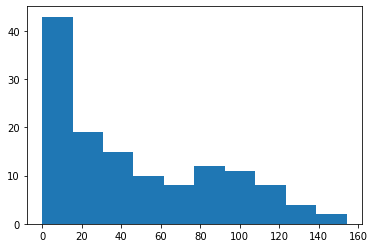

In [36]:
plt.hist(cricData['Runs'])
plt.show()

##### 3. Whenever Virat Kohli has scored 90-100 runs (exclude 100), what has been the average strike rate?

In [37]:
runs90to100Df = cricData[cricData['Runs'] >= 90]
runs90to100Df = runs90to100Df[runs90to100Df['Runs'] < 100]

In [38]:
runs90to100Df

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out,Quarter,Year
11,91,136,102,7,0,89.21,3,caught,2,v Bangladesh,Dhaka,2010-01-07,False,1,2010
44,94,135,104,10,0,90.38,3,run out,1,v West Indies,Kingston,2011-06-16,False,2,2011
88,99,159,100,9,0,99.00,3,caught,1,v West Indies,Visakhapatnam,2013-11-24,False,4,2013
119,91,148,97,9,1,93.81,3,caught,1,v Australia,Perth,2016-01-12,False,1,2016


In [39]:
runs90to100Df['SR'].sum() / len(runs90to100Df['SR'])

93.1

##### 4. Plot a pie chart to find out the approximate percentage of the times Virat Kohli has been out by different ways in all his innings. Take into account all his innings, including the ones in which he remained not out.

In [40]:
groupByDismissal = cricData.groupby(['Dismissal'])
groupByDismissal = groupByDismissal.count()
groupByDismissal = groupByDismissal['Runs']
groupByDismissal

Dismissal
bowled        10
caught        84
hit wicket     1
lbw            9
not out       17
run out       10
stumped        1
Name: Runs, dtype: int64

In [41]:
totalBowled = groupByDismissal.loc['bowled']
totalCaught = groupByDismissal.loc['caught']
totalHitW = groupByDismissal.loc['hit wicket']
totalLbw = groupByDismissal.loc['lbw']
totalNotOut = groupByDismissal.loc['not out']
totalRunOut = groupByDismissal.loc['run out']
totalStumped = groupByDismissal.loc['stumped']
totalInnings = groupByDismissal.sum()

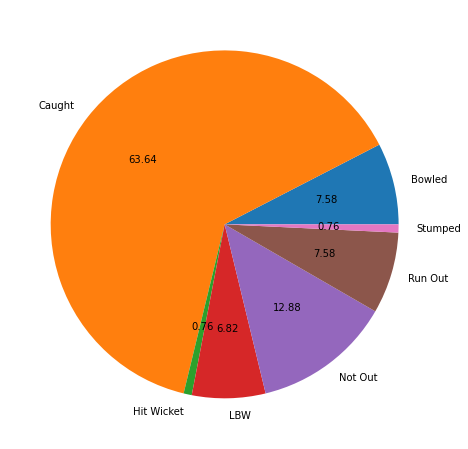

In [46]:
plt.figure(figsize=(8, 8))
plt.pie(x=[totalBowled, totalCaught, totalHitW, totalLbw, totalNotOut, totalRunOut, totalStumped], labels= ['Bowled', 'Caught', 'Hit Wicket', 'LBW', 'Not Out', 'Run Out', 'Stumped'], autopct='%.2f', explode=[0, 0, 0, 0, 0, 0, 0])
plt.show()

##### 5. Plot a Box Plot to analyse the spread of Runs that Virat has scored. The upper fence in the box plot lies in which interval?

a) 100-120 b) 120-140 c) 140-160 d) 160-180

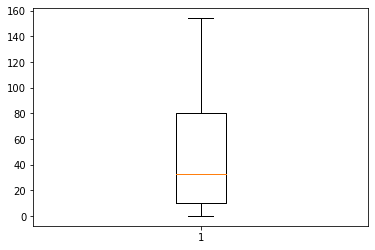

In [47]:
plt.boxplot(cricData['Runs'])
plt.show()

**ANS: Option C.**

##### 6. Consider the following statements and choose the correct option
1. Virat has played the maximum number of matches in 2011
2. Virat has the highest run average in the year 2017 
3. Virat has the maximum score in a single match and the highest run average in the year 2016.

Which of the above statements is/are false?

In [52]:
cricData['Year'].value_counts().idxmax()

2011

In [56]:
battingAvgPerYear = cricData.groupby(['Year']).mean()

In [57]:
battingAvgPerYear

,Runs,Mins,BF,4s,6s,SR,Pos,Inns,Not Out,Quarter
Year,,,,,,,,,,
2008,31.800000,57.400000,47.800000,4.200000,0.200000,64.948000,1.400000,1.400000,0.000000,3.000000
2009,38.333333,47.333333,42.833333,4.333333,0.166667,92.448333,4.833333,1.500000,0.166667,3.833333
2010,45.375000,67.437500,51.812500,4.312500,0.250000,64.133125,3.125000,1.625000,0.125000,2.625000
2011,42.000000,61.258065,48.387097,3.903226,0.225806,73.765161,3.838710,1.580645,0.161290,2.354839
2012,40.363636,69.000000,48.909091,3.272727,0.090909,64.293636,3.090909,1.545455,0.090909,2.181818
2013,47.826087,69.652174,47.304348,5.217391,0.826087,83.085652,3.000000,1.565217,0.173913,2.739130
2014,58.529412,80.764706,57.411765,5.235294,1.117647,81.761176,3.294118,1.647059,0.117647,2.882353
2015,30.400000,57.700000,37.600000,1.500000,0.700000,66.631000,3.300000,1.500000,0.000000,2.800000
2016,73.900000,109.300000,73.900000,6.200000,0.800000,93.262000,3.000000,1.600000,0.200000,2.500000


In [58]:
battingAvgObjPerYear = {
    'Year': [],
    'Avg Runs': []
}
for i in battingAvgPerYear.index:
    battingAvgObjPerYear['Year'].append(i)
    battingAvgObjPerYear['Avg Runs'].append(battingAvgPerYear.loc[i]['Runs'])

In [59]:
battingAvgObjPerYear

{'Year': [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
 'Avg Runs': [31.8,
  38.333333333333336,
  45.375,
  42.0,
  40.36363636363637,
  47.82608695652174,
  58.529411764705884,
  30.4,
  73.9,
  61.666666666666664]}

In [60]:
battingAvgObjPerYearDf = pd.DataFrame(battingAvgObjPerYear)
battingAvgObjPerYearDf

,Year,Avg Runs
0,2008,31.800000
1,2009,38.333333
2,2010,45.375000
3,2011,42.000000
4,2012,40.363636
5,2013,47.826087
6,2014,58.529412
7,2015,30.400000
8,2016,73.900000
9,2017,61.666667


In [61]:
battingAvgObjPerYearDf.loc[battingAvgObjPerYearDf['Avg Runs'].idxmax()]

Year        2016.0
Avg Runs      73.9
Name: 8, dtype: float64

In [71]:
runsPerYear = cricData.groupby(['Year']).max()

In [72]:
runsPerYear

,Runs,Mins,BF,4s,6s,SR,Pos,Dismissal,Inns,Opposition,Ground,Start Date,Not Out,Quarter
Year,,,,,,,,,,,,,,
2008,54,87,67,7,1,81.81,2,run out,2,v Sri Lanka,Dambulla,2008-08-29,False,3
2009,107,93,114,11,1,142.10,7,not out,2,v Sri Lanka,Vadodara,2009-12-24,True,4
2010,118,193,121,11,2,107.36,5,run out,2,v Zimbabwe,Visakhapatnam,2010-12-10,True,4
2011,117,154,123,16,2,209.09,7,stumped,2,v West Indies,Visakhapatnam,2011-12-11,True,4
2012,128,187,119,12,1,107.56,4,not out,2,v Sri Lanka,Sydney,2012-12-30,True,4
2013,115,159,108,18,7,192.30,3,run out,2,v Zimbabwe,Visakhapatnam,2013-12-08,True,4
2014,139,192,126,16,3,120.00,4,run out,2,v West Indies,Wellington,2014-11-16,True,4
2015,138,202,140,6,5,116.66,4,run out,2,v South Africa,Sydney,2015-10-25,False,4
2016,154,202,134,16,2,115.21,3,run out,2,v New Zealand,Visakhapatnam,2016-10-29,True,4


In [73]:
runsPerYearObj = {
    'Year': [],
    'Max Runs': []
}
for i in runsPerYear.index:
    runsPerYearObj['Year'].append(i)
    runsPerYearObj['Max Runs'].append(runsPerYear.loc[i]['Runs'])

In [74]:
runsPerYearDf = pd.DataFrame(runsPerYearObj)

In [76]:
runsPerYearDf.loc[runsPerYearDf['Max Runs'].idxmax()]

Year        2016
Max Runs     154
Name: 8, dtype: int64

**ANS: Option B. is only FALSE**

##### 7. Plot a histogram for the Mins column with 15 bins. Among the three ranges mentioned below, which one has the highest frequency?

A - [54.6,68)

B - [68,81.4)

C - [121.6,135)

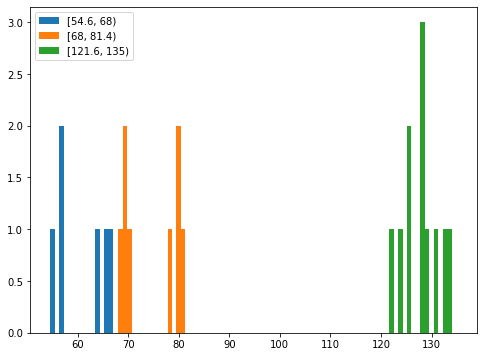

In [89]:
plt.figure(figsize=(8,6))
plt.hist(x=cricData['Mins'], range=[54.6, 67.9], bins=15)
plt.hist(x=cricData['Mins'], range=[68, 81.3], bins=15)
plt.hist(x=cricData['Mins'], range=[121.6, 134.9], bins=15)
plt.legend(['[54.6, 68)', '[68, 81.4)', '[121.6, 135)'])
plt.show()

**ANS: Option C.**